# Analisis de datos

## Importe de librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de datos

In [3]:
# Ruta de la carpeta donde están los archivos
carpeta = "data/"
# Nombres de los archivos
archivos = ["X.csv", "Y.csv", "Z.csv"]

# Leer cada archivo y guardarlo en un dataframe con el delimitador adecuado
df_X = pd.read_csv(f"{carpeta}{archivos[0]}", sep=",", header=0)
df_Y = pd.read_csv(f"{carpeta}{archivos[1]}", sep=";", header=0)
df_Z = pd.read_csv(f"{carpeta}{archivos[2]}", sep=",", header=0)

In [4]:
print(df_X.info(),df_Y.info(),df_Z.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9144 entries, 0 to 9143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9144 non-null   object 
 1   Price   9144 non-null   float64
dtypes: float64(1), object(1)
memory usage: 143.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4485 non-null   object
 1   Price   4485 non-null   object
dtypes: object(2)
memory usage: 70.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3565 non-null   float64
 1   Date    3565 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.8+ KB
None None None


Se puede observar que los  tipos de datos no coinciden, para la materia prima Y, los precios son de tipo objeto, mientras en los demas de tipo flotante, por otro lado las fechas deben tener formato de fecha.

In [5]:
print('MATERIA PRIMA X',df_X.describe())
print('MATERIA PRIMA Y',df_Y.describe())
print('MATERIA PRIMA Z',df_Z.describe())

MATERIA PRIMA X              Price
count  9144.000000
mean     51.323922
std      32.994964
min       9.640000
25%      19.687500
50%      45.940000
75%      75.207500
max     146.080000
MATERIA PRIMA Y              Date Price
count        4485  4485
unique       4485  1237
top     12/9/2023   470
freq            1   111
MATERIA PRIMA Z              Price
count  3565.000000
mean   2037.081197
std     372.976076
min    1421.500000
25%    1767.500000
50%    1974.750000
75%    2235.750000
max    3984.000000


No hay datos nulos ni vacios en ninguno de los 3 dataset, conviene unirlos en forma de fecha, precio x , precio y, y precio z

In [6]:
df_X.head(3)

,Date,Price
0,2024-04-04,89.18
1,2024-04-03,89.35
2,2024-04-02,88.92


In [7]:
dfX=df_X.rename(columns={"Price": "P_x"})
dfY=df_Y.rename(columns={"Price": "P_y"})
dfZ=df_Z.rename(columns={"Price": "P_z"})

In [8]:
print(dfX['Date'].unique())
print(dfY['Date'].unique())
print(dfZ['Date'].unique())

['2024-04-04' '2024-04-03' '2024-04-02' ... '1988-06-29' '1988-06-28'
 '1988-06-27']
['12/9/2023' '11/9/2023' '8/9/2023' ... '13/7/2006' '12/7/2006'
 '11/7/2006']
['2010-01-01' '2010-01-04' '2010-01-05' ... '2023-08-29' '2023-08-30'
 '2023-08-31']


en la siguiente celda se modificará el tipo de dato de la fecha de los 3 dataframe

In [9]:
dfX['Date'] = pd.to_datetime(dfX['Date'])
dfY['Date'] = pd.to_datetime(dfY['Date'], format="%d/%m/%Y")
dfZ['Date'] = pd.to_datetime(dfZ['Date'])

notece que los datos de Y estaban en otro formato

In [10]:
dfZ.head(3)

,P_z,Date
0,2225.25,2010-01-01
1,2225.25,2010-01-04
2,2246.50,2010-01-05


Ahora, los datos de los precios tambien hay que arreglarlos pues unos tienen el decimal con coma y otro con punto, comparemos el dfZ que esta arriba (decimal con punto) y el dataframe dfY (decimal con coma)

In [11]:
dfY.head()

,Date,P_y
0,2023-09-12,"547,33"
1,2023-09-11,546
2,2023-09-08,545
3,2023-09-07,550
4,2023-09-06,"552,5"


Como los valores numericos de dfY tienen el decimal con coma, se debe cambiar a punto para que sea consistente con los otros dataframes. Esto se puede hacer reemplazando la coma por un punto en la columna 'P_y'.

In [12]:
dfY["P_y"] = dfY["P_y"].str.replace(",", ".", regex=False)

In [13]:
dfY.head()

,Date,P_y
0,2023-09-12,547.33
1,2023-09-11,546
2,2023-09-08,545
3,2023-09-07,550
4,2023-09-06,552.5


In [14]:
dfY= dfY.astype({"P_y": "float64"})

In [15]:
print(dfY['Date'].dtype,dfY['P_y'].dtype)

datetime64[ns] float64


In [31]:
merge=dfX.merge(dfY, on="Date").merge(dfZ, on="Date")
merge.set_index("Date", inplace=True)

In [32]:
merge.head()

,P_x,P_y,P_z
Date,,,
2023-08-31,86.86,545.00,2165.25
2023-08-30,85.86,543.67,2140.25
2023-08-29,85.49,545.33,2116.25
2023-08-28,84.42,549.00,2116.25
2023-08-25,84.48,554.00,2123.50


No hay datos nulos ni vacios en el merge

In [33]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3530 entries, 2023-08-31 to 2010-01-04
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P_x     3530 non-null   float64
 1   P_y     3530 non-null   float64
 2   P_z     3530 non-null   float64
dtypes: float64(3)
memory usage: 110.3 KB


In [34]:
print(df_X.info(),df_Y.info(),df_Z.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9144 entries, 0 to 9143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9144 non-null   object 
 1   Price   9144 non-null   float64
dtypes: float64(1), object(1)
memory usage: 143.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4485 non-null   object
 1   Price   4485 non-null   object
dtypes: object(2)
memory usage: 70.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3565 non-null   float64
 1   Date    3565 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.8+ KB
None None None


Los datos se redujeron a 3530 filas, dado que en el merge necesitamos datos de todas las materias primas en cada fecha, debido a que los datos de la materia prima Z es la mas pequeña el número de filas sera igual o menos a este, y si hay una fecha sin alguno de los valores de las materias primas en x o y esa fila será eliminada

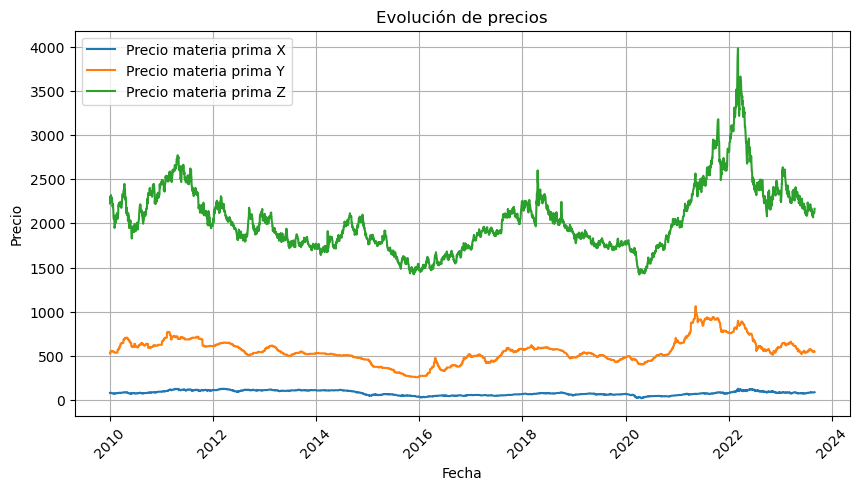

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(data=merge, x="Date", y="P_x", label="Precio materia prima X")
sns.lineplot(data=merge, x="Date", y="P_y", label="Precio materia prima Y")
sns.lineplot(data=merge, x="Date", y="P_z", label="Precio materia prima Z")

plt.title("Evolución de precios")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Ahora que los datos de los precios tienen el formato correcto, y estan corregidos, es posible hallar los precios de los equipos 1 y 2, teniendo en cuenta las instrucciones, el equipo 1 esta compuesto por 20% de la materia prima X y el resto (80%)por la materia prima Y, mientras que el equipo 2 se reparte en partes iguales (1/3 cada una)

In [40]:
df= pd.DataFrame({
    "Date": merge.index,
    "Equipo1": 0.2 * merge["P_x"] + 0.8 * merge["P_y"],
    "Equipo2": (merge["P_x"] + merge["P_y"] + merge["P_z"]) / 3
})
df.set_index("Date", inplace=True)
df.head(3)

,Equipo1,Equipo2
Date,,
2023-08-31,453.372,932.37
2023-08-30,452.108,923.26
2023-08-29,453.362,915.69


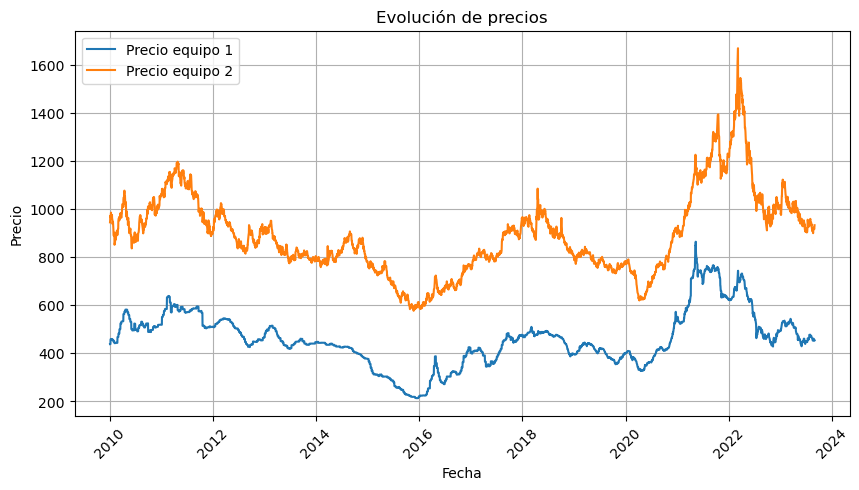

In [41]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Date", y="Equipo1", label="Precio equipo 1")
sns.lineplot(data=df, x="Date", y="Equipo2", label="Precio equipo 2")

plt.title("Evolución de precios")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [42]:
df.describe()

,Equipo1,Equipo2
count,3530.000000,3530.000000
mean,460.039889,890.350065
std,113.352741,169.531556
min,213.222000,577.026667
25%,399.035000,780.118333
50%,449.834000,873.636667
75%,514.120000,979.438333
max,863.760000,1668.053333


In [43]:
df.head(3)

,Equipo1,Equipo2
Date,,
2023-08-31,453.372,932.37
2023-08-30,452.108,923.26
2023-08-29,453.362,915.69
